# **AP155 Lab Assignment**
## Module 5: Partial Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



### Student Information

_Full Name (Last Name, First Name)_: Quiamjot, Allyn Christian \
_Student No._: 2021-07198\
_Section_: HX-2

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: ALLYN CHRISTIAN I. QUIAMJOT**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/100

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Schrodinger equation and the Crank-Nicolson method**

_Refer to Exercise 9.8 in the Newman text._ In this problem, you will use the Crank-Nicolson method to solve the full time-dependent Schrodinger equation and hence develop a picture of how a wavefunction evolves over time.

Consider an electron (mass $M = 9.109 \times 10^{-31}$ kg) in a box of length $L = 10^{-8}$ m. Suppose that at time $t = 0$ the wavefunction of the electron has the form

$$ \psi(x,0) = \exp\left[-\frac{(x-x_0)^2}{2\sigma^2}\right]e^{i\kappa x},$$
where $x_0 = \frac{L}{2}$, $\sigma = 1 \times 10^{-10}$ m, $\kappa = 5 \times 10^{10} {\rm m}^{-1}$,  and $\psi = 0$ on the walls at $x = 0$ and $x = L$.

1. Perform a single step of the Crank-Nicolson method for this electron, calculating the vector $\psi(t)$ of values of the wavefunction, given the initial wavefunction above and using $N = 1000$ spatial slices with $a = L/N$. Your program will have to perform the following steps. First, given the vector $\psi(0)$ at $t = 0$, you will have to multiply by the matrix $\bf{B}$ to get a vector $\bf{v} = \bf{B}\psi$. Because of the tridiagonal form of $\bf{B}$, this is fairly simple. The $i$th component of $\bf{v}$ is given by
$$ v_i = b_1\psi_i + b_2(\psi_{i+1} + \psi_{i-1}).$$

   You will also have to choose a value for the time-step $h$. A reasonable choice is $h = 10^{-18}$ s. *(30 pts.)*

2. Second you will have to solve the linear system ${\bf Ax}= {\bf v}$ for $\bf{x}$, which gives you the new value of $\psi$. You could do this using a standard linear equation solver like the function $\tt solve$ in numpy's $\tt linalg$. *(20 pts.)*

3. Once you have the code in place to perform a single step of the calculation, extend your program to perform repeated steps and hence solve for $\psi$ at a sequence of times a separation $h$ apart. Note that the matrix $\bf A$ is independent of time, so it doesn't change from one step to another. You can set up the matrix just once and then keep on reusing it for every step. *(30 pts.)*

4. Make an animation of the solution by displaying the real part of the wavefunction at each time-step. You can use the function rate from the package visual to ensure a smooth frame-rate for your animation-- see Section 3.5 on page 117 of the Newman text.

   Run your animation for a while and describe what you see. Write a few sentences explaining in physics terms what is going on in the system. *(20 pts.)*

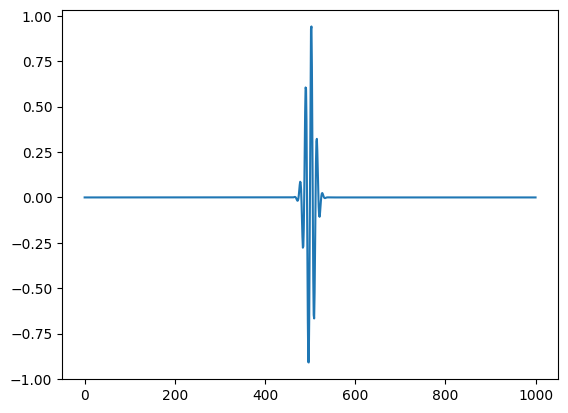

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

sigma = 1e-10
kappa = 5e10
L = 1e-8
N = 1000
M = 9.109e-31
h = 1e-18
h_bar = 1.054571817e-34
x0 = L/2

a = L/N

psi = np.zeros(N+1,complex)

a1 = 1 + h*1j*h_bar/2*M*a**2
a2 = -h*1j*h_bar/4*M*a**2
b1 = 1 - h*1j*h_bar/2*M*a**2
b2 = h*1j*h_bar/4*M*a**2

def PSI(x):
    return np.exp(-((x-x0)**2)/(2*sigma**2))*np.exp(1j*kappa*x)

x = np.linspace(0,L,N+1)
psi[:]= PSI(x)
psi[[0,N]] = 0         #   setting boundary condition

v=[]
for i in range(1,N):
    v.append(b1*psi[i] + b2*(psi[i+1]+psi[i-1]))

plt.plot(psi)
plt.show()